# Advent of Code 2021 - Day 9

In [1]:
EXAMPLE = False
filename = "input.txt"
if EXAMPLE: filename = "example.txt"
    
data = []
with open(filename, "r") as f:
    for line in f:
        data.append(line.strip())

data[:10]

['8654434789432446987654321056789235678953245798764212456789656568977654232457898754567898765431335999',
 '8743125678931234599987643238993123567894345989542101234678943459865432101345789643479999878540129877',
 '9651056799320125678998764369895644678965956976543233458799202568986574519499996532445989998761298956',
 '6543234789632347899219865456789795789879899898754755567893212456998986798987897621234678979872987645',
 '7887645696543456799423989978998989893989767789865676679995343689879497986596789432349899865989876434',
 '8998967789999577897999799999457678902497645699876799798789459798767329876455678943456798764699987569',
 '9999878899878988956986678953234567893989534578997998987689567976543213984323589894967899643209898978',
 '0987999999767899549875439870146789999875323466899886596578979987954201987312398789898978965799769989',
 '2996567899656795423964321981269893987983212345689765434499898799865332975201297598789467979987654292',
 '98754569989457890198759929843789424965432014567898975

## Part 1

In [2]:
heightmap = [[int(d) for d in x] for x in data]

In [3]:
def Get_Neighbor_Coordinates(i, j):
    up = (i - 1, j)
    down = (i + 1, j)
    left = (i, j -1)
    right = (i, j + 1)
    return up, down, left, right

In [4]:
low_points = []

for i, row in enumerate(heightmap):
    for j, col in enumerate(row):
        
        current = int(heightmap[i][j])
        neighbors_coordinates = Get_Neighbor_Coordinates(i, j)
        
        neighbors = []
        for a, b in neighbors_coordinates:
            if a in range(len(heightmap)) and b in range(len(row)):
                valid_neighbor = heightmap[a][b]
                neighbors += [valid_neighbor]
        
        if int(current) < min(neighbors):
            low_points += [(i, j)]

In [5]:
risk_levels = []
for i, j in low_points:
    risk_levels += [heightmap[i][j] + 1]
sum(risk_levels)

439

## Part 2

In [6]:
def Find_Everything_Connected_To(i, j, heightmap, res):
    neighbors_coordinates = Get_Neighbor_Coordinates(i, j)
    valid_neighbors_coordinates = [c for c in neighbors_coordinates if c[0] in range(len(heightmap)) and c[1] in range(len(row))]
    
    for a, b in valid_neighbors_coordinates:
        valid_neighbor = int(heightmap[a][b])
        if valid_neighbor != 9:
            if not (a, b) in res:
                res[(a, b)] = valid_neighbor
                Find_Everything_Connected_To(a, b, heightmap, res)

In [7]:
basin_sums = []
for i, j in low_points:
    res = {}
    Find_Everything_Connected_To(i, j, heightmap, res)
    basin_sums += [len(res)]

sorted(basin_sums)[-3] * sorted(basin_sums)[-2] * sorted(basin_sums)[-1]

900900

## Visualization

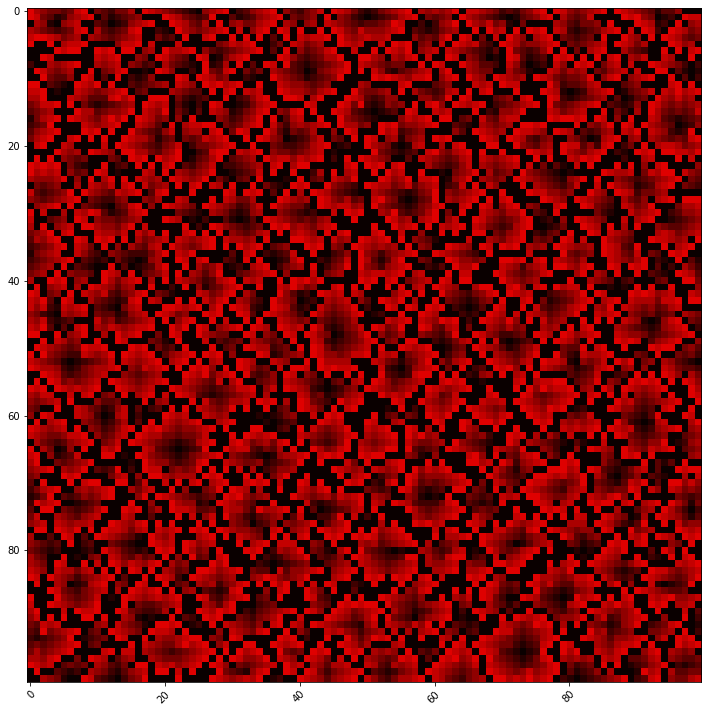

In [8]:
import numpy as np
import matplotlib.pyplot as plt

for i in range(len(heightmap)):
    for j in range(len(heightmap[0])):
        if heightmap[i][j] == 9:
            heightmap[i][j] = 0
    
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(heightmap, cmap='hot', interpolation='nearest', vmin=0, vmax=25)
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")


fig.tight_layout()
plt.show()